In [1]:
%matplotlib notebook
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

import numpy as np
from scipy.spatial.transform import Rotation

def get_array_frame(a):
    return np.concatenate([a[:,0],a[-1,1:],a[-2::-1,-1],a[0,-2::-1]])

In [2]:
ottidetdist = 179.287

x = np.arange(1024)*75e-3
z = np.arange(512)*75e-3
y = np.asarray([ottidetdist])
x = x-np.mean(x.ravel())
z = z-np.mean(z.ravel())
X,Y,Z = np.meshgrid(x,y,z)

pixcoo = np.vstack([X.ravel(),Y.ravel(),Z.ravel()])
detdir = np.asarray([0,-1,0])

rotcencoo = np.asarray([46,77.436,0])
samplecoo = np.asarray([0,0,0])

ottidel = np.radians(45)
ottinu = np.radians(70)
ottidet = -ottinu


pixcoo_ottidet = np.asarray(Rotation.from_rotvec(np.asarray([0,ottidet,0])).as_matrix()*np.asmatrix(pixcoo))
pixcoo_ottidel = np.asarray(Rotation.from_rotvec(np.asarray([ottidel,0,0])).as_matrix()*np.asmatrix(pixcoo_ottidet))
pixcoo_ottinu = np.asarray(Rotation.from_rotvec(np.asarray([0,ottinu,0])).as_matrix()*np.asmatrix(pixcoo_ottidel))
pixcoo_otti = pixcoo_ottinu+rotcencoo[:,np.newaxis]

detdir_otti = np.asarray(
    Rotation.from_rotvec(np.asarray([0,ottinu,0])).as_matrix()*
    (Rotation.from_rotvec(np.asarray([ottidel,0,0])).as_matrix()*
    np.asmatrix(detdir[:,np.newaxis]))
)
rxz = pixcoo_otti[0]**2 + pixcoo_otti[2]**2

pixdist = np.sqrt(rxz+pixcoo_otti[1]**2).reshape(X.shape[1:])
nu = np.arctan2(pixcoo_otti[0],pixcoo_otti[2]).reshape(X.shape[1:])
delta = np.arctan2(pixcoo_otti[1],np.sqrt(rxz)).reshape(X.shape[1:])



<IPython.core.display.Javascript object>


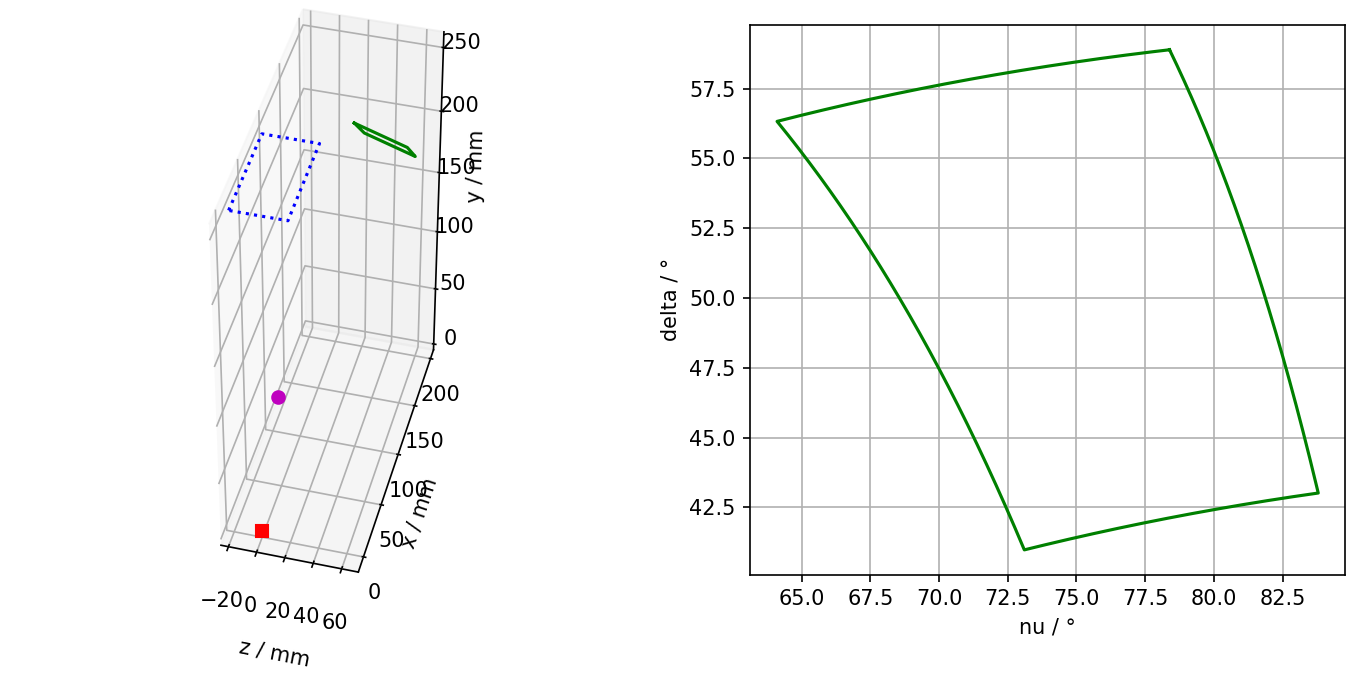

267.32135318261226
75.13639799078605
50.00315542055596
[[-0.66446302]
 [-0.70710678]
 [-0.24184476]]


In [3]:
fig = plt.figure(figsize=[8,4])

ax = fig.add_subplot(1,2,1,projection='3d')


plpixcoo = np.roll(pixcoo+rotcencoo[:,np.newaxis],1,axis=0)
plpixcoo_otti = np.roll(pixcoo_otti,1,axis=0)
plrotcencoo = np.roll(rotcencoo,1,axis=0)
plsamplecoo = np.roll(samplecoo,1,axis=0)

ax.set_box_aspect(np.ptp(np.concatenate([plpixcoo,plpixcoo_otti,plrotcencoo[:,np.newaxis],plsamplecoo[:,np.newaxis]],axis=1),axis=1))
# ax.set_box_aspect(np.ptp(pixcoo,axis=1))
ax.plot(*plrotcencoo,'om')

ax.plot(*plsamplecoo,'sr')
ax.plot(*[get_array_frame(ta.reshape(X.shape[1:])) for ta in plpixcoo],':b')
# ax.plot(*plpixcoo,'.b')
# ax.plot(*plpixcoo_otti,'xg')
ax.plot(*[get_array_frame(ta.reshape(X.shape[1:])) for ta in plpixcoo_otti],'g')

ax.set_xlabel('z / mm')
ax.set_ylabel('x / mm')
ax.set_zlabel('y / mm')
# ax.set_box_aspect((np.ptp(np.concatenate([pixcoo,pixcoo_ottidel,pixcoo_ottidet],axis=0),axis=1)

axn = fig.add_subplot(1,2,2)
axn.set_xlabel('nu / °')
axn.set_ylabel('delta / °')

i1 = axn.plot(np.degrees(get_array_frame(nu)),np.degrees(get_array_frame(delta)),'-g')
plt.tight_layout()


print(np.mean(pixdist))
print(np.degrees(np.mean(nu)))
print(np.degrees(np.mean(delta)))
print(detdir_otti)